In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import nltk
import re


In [30]:
dataset = pd.read_csv('labeled_data.csv')
print(dataset)
X = dataset.iloc[:,-1].values
Y = dataset.iloc[:,5].values

print(X)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

# Cleaning the tweets

In [31]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
clean_tweet_data = []
length = len(X)
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
for i in range(0,length):
  tweet = re.sub(r'https?://\S+|www\.\S+',"",X[i])
  tweet = re.sub(r'@\w+\s*','',X[i])
  tweet = re.sub(r'&#\w+\s*','',X[i])
  tweet = re.sub('[^a-zA-Z]', ' ', X[i])
  tweet = tweet.lower()
  tweet = tweet.split()
  ps = PorterStemmer()
  tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords)]
  tweet = ' '.join(tweet)
  clean_tweet_data.append(tweet)


clean_tweet_data[:10]

    
  
    

[nltk_data] Downloading package stopwords to C:\Users\Brandon
[nltk_data]     Williams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['rt mayasolov woman complain clean hous amp man alway take trash',
 'rt mleew boy dat cold tyga dwn bad cuffin dat hoe st place',
 'rt urkindofbrand dawg rt sbabi life ever fuck bitch start cri confus shit',
 'rt c g anderson viva base look like tranni',
 'rt shenikarobert shit hear might true might faker bitch told ya',
 'madison x shit blow claim faith somebodi still fuck hoe',
 'brighterday not sit hate anoth bitch got much shit go',
 'selfiequeenbri caus tire big bitch come us skinni girl',
 'amp might not get ya bitch back amp that',
 'rhythmixx hobbi includ fight mariam bitch']

# Creating the bag of word model

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(clean_tweet_data).toarray()
print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Splitting dataset into training and test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


{0: 1151, 1: 15338, 2: 3337}


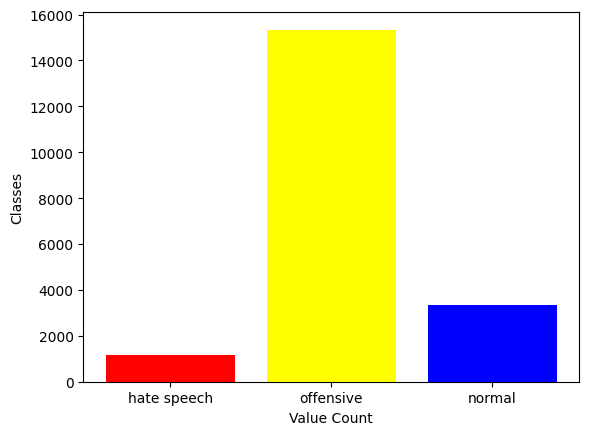

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
count = {
    0:0,
    1:0,
    2:0
}

for i in y_train:
    count[i]+=1

print(count)

keys = ['hate speech','offensive','normal']
values = count.values()

plt.bar(keys,values,color = ['red','yellow','blue'])
plt.xlabel("Value Count")
plt.ylabel("Classes")
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model = LogisticRegression(random_state = 0)
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
svc = SVC(kernel = 'linear', random_state = 0)

model.fit(X_train, y_train)
classifier.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
y_pred_log = model.predict(X_test)
y_pred_r = classifier.predict(X_test)
y_pred_rf = classifier2.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

cm_log = confusion_matrix(y_test,y_pred_log)
score_log = accuracy_score(y_test,y_pred_log)

score_r = accuracy_score(y_test,y_pred_r)
score_rf =accuracy_score(y_test,y_pred_rf)
score_sv =accuracy_score(y_test,y_pred_svc)

print("log : ",score_log)
print("des : ",score_r)
print("des forest : ",score_rf)
print("SVC : ",score_sv)

log :  0.9019568287270526
des :  0.8692757716360702
des forest :  0.8930804922332055
SVC :  0.9007464192051644


In [37]:

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=256, activation='relu',input_shape=(1500,)))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 3, activation='softmax'))

ann.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
print(y_train)
ann.fit(X_train, y_train, batch_size = 64, epochs = 15)
y_pred_ann = np.argmax(ann.predict(X_test),axis=1)

score_an =accuracy_score(y_test,y_pred_ann)
print("ann : ",score_an)

[1 1 1 ... 1 1 1]
Epoch 1/15


C:\Users\Brandon Williams\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8142 - loss: 0.5005
Epoch 2/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9253 - loss: 0.2120
Epoch 3/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9532 - loss: 0.1326
Epoch 4/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9700 - loss: 0.0802
Epoch 5/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.0527
Epoch 6/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9875 - loss: 0.0367
Epoch 7/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9907 - loss: 0.0260
Epoch 8/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0220
Epoch 9/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9906 - loss: 0.0231
Epoch 10/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9925 - loss: 0.0184
Epoch 11/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9906 - loss: 0.0263
Epoch 12/15
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

In [38]:
import joblib
prediction = ["hate_speech","offensive","Normal"]
text_data= []


#model_tree = joblib.load('nsfw_text.h5')
#vectorizer_text = joblib.load('vector_text.joblib')
text = ''' you are retarded  '''
# text_array = text.split('.')
# length = len(text_array)
# for text in text_array:
    
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
text = ' '.join(text)
text_data.append(text)




text_pro = cv.transform(text_data).toarray()
flag = True

y_p = svc.predict(text_pro)
# for i in range(0, len(text_pro)):
#     y_p = svc.predict([text_pro[i]])
#     if  y_p[0] == 0 or y_p[0] == 1:
#         print("Line Number : ",i+1,"",text_data[i],prediction[y_p[0]])
#         flag = False

# if flag:
#    print("Clean text") 
print(y_p)
print(prediction[y_p[0]])

# joblib.dump(svc, 'text_filter_svc.h5')
# joblib.dump(cv, 'vectorizer.joblib')


[1]
offensive
